In [1]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import matplotlib.pyplot as plt             
import seaborn as sn
import pandas as pd

# Loading the dataset

In [2]:
top_words=5000
input_length= 500
(X_train,y_train),(X_test, y_test)= imdb.load_data(num_words=top_words)

# Convert movie review data to feature matrix

In [3]:

X_train =  sequence.pad_sequences(X_train,maxlen=input_length)
print(); print(X_train.shape); print(X_train)

X_test =  sequence.pad_sequences(X_test,maxlen=input_length)
print(); print(X_train.shape); print(X_train)


(25000, 500)
[[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]

(25000, 500)
[[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


# setup a CNN network


In [4]:
model = Sequential()
model.add(Embedding(top_words,32,input_length=input_length))
model.add(Conv1D(filters=32,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [6]:
    

history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100,batch_size=128)

Epoch 1/100
196/196 [==============================] - 14s 70ms/step - loss: 0.4936 - accuracy: 0.7193 - val_loss: 0.3062 - val_accuracy: 0.8700
Epoch 2/100
196/196 [==============================] - 14s 73ms/step - loss: 0.2250 - accuracy: 0.9124 - val_loss: 0.2755 - val_accuracy: 0.8850
Epoch 3/100
196/196 [==============================] - 15s 74ms/step - loss: 0.1686 - accuracy: 0.9355 - val_loss: 0.2928 - val_accuracy: 0.8818
Epoch 4/100
196/196 [==============================] - 15s 79ms/step - loss: 0.1252 - accuracy: 0.9562 - val_loss: 0.3215 - val_accuracy: 0.8785
Epoch 5/100
196/196 [==============================] - 15s 74ms/step - loss: 0.0775 - accuracy: 0.9772 - val_loss: 0.4012 - val_accuracy: 0.8712
Epoch 6/100
196/196 [==============================] - 13s 68ms/step - loss: 0.0376 - accuracy: 0.9911 - val_loss: 0.4769 - val_accuracy: 0.8708
Epoch 7/100
196/196 [==============================] - 14s 74ms/step - loss: 0.0146 - accuracy: 0.9979 - val_loss: 0.5545 - val_ac

* final evaluation of the model

In [14]:

scores = model.evaluate(X_test,y_test,verbose=1)

782/782 [==============================] - 4s 5ms/step - loss: 2.0517 - accuracy: 0.8674


# plots of accuracy and loss function and some predictions 

In [15]:
prediction = model.predict(X_test)

In [16]:
import numpy as np
prediction = np.asarray(prediction).reshape(1, -1)[0,:]
print(prediction[:5])

[7.7018558e-05 1.0000000e+00 9.9999762e-01 4.1797894e-09 1.0000000e+00]


In [17]:
print(y_test[:5])

[0 1 1 0 1]


In [18]:
from sklearn.metrics import confusion_matrix


In [19]:
true = pd.Categorical(list(np.where(np.array(y_test) == 1, 'good','bad')), categories = ['good','bad'])
prediction1 = pd.Categorical(list(np.where(np.array(prediction) == 1, 'good','bad')), categories = ['good','bad'])

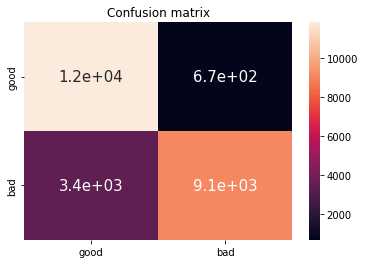

In [20]:
CM = confusion_matrix(true, prediction1)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 15}, 
           xticklabels=['good','bad'], 
           yticklabels=['good','bad'], ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [23]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(20,10))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

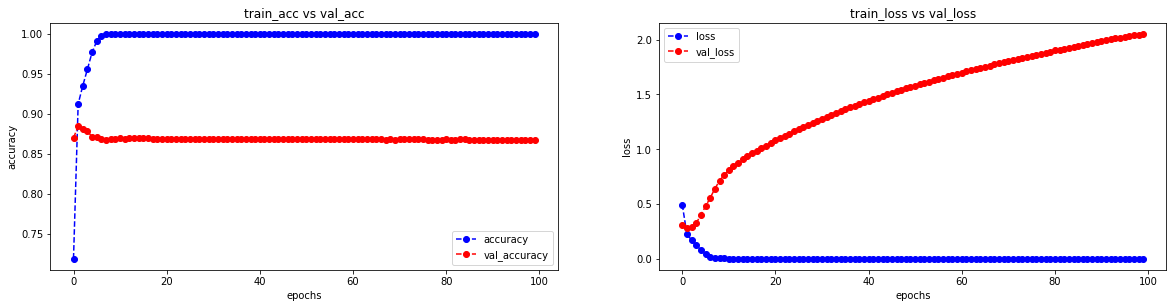

In [24]:
plot_accuracy_loss(history)